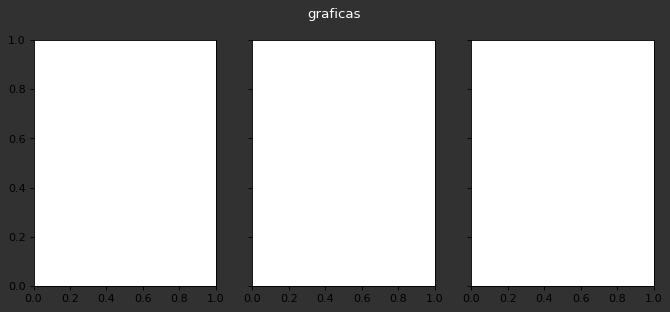

In [18]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import Clase_mruv as mruv
import os


def leer_variables():   
    ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
    os.chdir(ruta_principal)
    os.chdir('./Archivos_Mru/')
    
    nombre = et_nombre.get() 
    velocidad_inicial = et_Velocidad_Ini.get() if len(et_Velocidad_Ini.get()) != 0 else 0
    velocidad_final = et_Velocidad_fin.get() if len(et_Velocidad_fin.get()) != 0 else 0
    tiempo =et_Tiempo.get() if len(et_Tiempo.get()) != 0 else 0
    posicion_final = et_Posicion_fin.get() if len(et_Posicion_fin.get()) != 0 else 0
    aceleracion = et_Aceleracion.get() if len(et_Aceleracion.get()) != 0 else 0

   
    objeto_Mruv=mruv.MRUV(nombre,float(posicion_final),float(aceleracion),float(velocidad_inicial),float(velocidad_final),float(tiempo))

    print(nombre,float(posicion_final),float(aceleracion),float(velocidad_inicial),float(velocidad_final),float(tiempo))
    aceleracion=objeto_Mruv.frm_acceleration()
    tiempo=objeto_Mruv.frm_tiempo()
    objeto_Mruv.listar_tiempo()
    objeto_Mruv.guardar_datos_aceleracion()
    objeto_Mruv.guardar_datos_velocidad()
    objeto_Mruv.guardar_datos_distancia()
    objeto_Mruv.unir_datos()
    archivo=objeto_Mruv.info_archivo()
    print(archivo)

    actualizar_combobox()
    completar_tabla(archivo)
    actualizar_grafico(archivo)
    actualizar_entry(tiempo,aceleracion)


def completar_tabla(archivo):
    ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
    os.chdir(ruta_principal)
    os.chdir('./Archivos_Mru/')

    df = pd.read_excel(archivo, 'Hoja 1')
    treeview_data.clear()  # Limpiar la lista existente
    
    # Actualizar los datos en treeview_data
    for _, row in df.iterrows():
        tiempo = row['Tiempo']
        distancia = row['distancia']
        acceleration = row['acceleration']
        velocidad = row['velocidad']
        objeto = row['objeto']
        objetodistancia = row['objetodistancia']
        
        treeview_data.append({
            'Tiempo': str(int(tiempo))+' s',
            'distancia': str(round(distancia,2))+' m',
            'acceleration': str(round(acceleration,2))+' m/s²',
            'velocidad': str(round(velocidad,2))+' m/s',
            'objeto': objeto,
            'objetodistancia': objetodistancia
        })
    
    # Insertar los datos en el Treeview
    insertar_datos_treeview()
    

def insertar_datos_treeview():
    # Limpiar los elementos existentes en el Treeview
    treeview.delete(*treeview.get_children())
    
    # Insertar los nuevos datos en el Treeview
    for i, dato in enumerate(treeview_data):
        iid = i + 1  # Identificador único del elemento
        tiempo = dato['Tiempo']
        distancia = dato['distancia']
        acceleration = dato['acceleration']
        velocidad = dato['velocidad']
        objeto = dato['objeto']
        objetodistancia = dato['objetodistancia']
        
        # Insertar el elemento en el Treeview
        treeview.insert(parent="", index="end", iid=iid, text=str(tiempo),
                        values=(distancia, acceleration, velocidad, objeto, objetodistancia))

def actualizar_grafico(archivo):
    ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
    os.chdir(ruta_principal)
    os.chdir('./Archivos_Mru/')

    # Leer los datos actualizados del archivo o de otra fuente
    df = pd.read_excel(archivo, 'Hoja 1')
    tiempo = df['Tiempo'].to_list()
    distancia = df['distancia'].to_list()
    aceleracion = df['acceleration'].to_list()
    velocidad = df['velocidad'].to_list()
    
    # Limpiar el gráfico existente
    axs[0].clear()
    
    # Actualizar los datos y propiedades del gráfico
    axs[0].plot(tiempo, distancia, linestyle='--', color='g')
    axs[0].tick_params(axis='x', colors='white')
    axs[0].tick_params(axis='y', colors='white')

    
    # Limpiar el gráfico existente
    axs[1].clear()
    
    # Actualizar los datos y propiedades del gráfico
    axs[1].plot(tiempo, aceleracion, linestyle='--', color='g')
    axs[1].tick_params(axis='x', colors='white')
    axs[1].tick_params(axis='y', colors='white')


    # Limpiar el gráfico existente
    axs[2].clear()
    
    # Actualizar los datos y propiedades del gráfico
    axs[2].plot(tiempo, velocidad, linestyle='--', color='g')
    axs[2].tick_params(axis='x', colors='white')
    axs[2].tick_params(axis='y', colors='white')
    
    # Redibujar el gráfico en el lienzo existente
    canvas.draw()

def actualizar_combobox():
    # Obtener la lista actualizada de archivos en el directorio
    ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
    os.chdir(ruta_principal)
    archivos = os.listdir('./Archivos_Mru')
    combo_list = [archivo.replace('.xlsx','') for archivo in archivos if archivo.endswith('.xlsx')]
    
    # Actualizar los valores del Combobox
    combobox['values'] = combo_list
    combobox.current(0)

def cambiar_combobox_graficos():

    ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
    os.chdir(ruta_principal)
    os.chdir('./Archivos_Mru/')
    archivo = str(combobox.get())+'.xlsx'
    completar_tabla(archivo)
    actualizar_grafico(archivo)


def actualizar_entry(tiempo,aceleracion):
    print('se ejecuto')
    texto = "Texto de ejemplo"
    et_alert.configure(state="normal")
    et_alert.delete(0, "end")
    et_alert.insert(0, texto)
    et_alert.configure(state="readonly") 


    et_tiempo_d.configure(state="normal")
    et_tiempo_d.delete(0, "end")
    et_tiempo_d.insert(0, int(tiempo))
    et_tiempo_d.configure(state="readonly") 

    et_acelerar_d.configure(state="normal")
    et_acelerar_d.delete(0, "end")
    et_acelerar_d.insert(0, round(aceleracion,2))
    et_acelerar_d.configure(state="readonly") 


ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
os.chdir(ruta_principal)

#os.chdir(r'D:/JUAN/PROYECTO_CAF_CLON/PROYECTO_MRUV_CAF_PY') #cambiar

ventana = tk.Tk()
ventana.title("Mruv")
ventana.iconbitmap("./Iconos/icono2.ico")
ventana.geometry('1350x600')
#ventana.configure(bg="#217346")

#responsive
ventana.columnconfigure(index=0, weight=1)
ventana.columnconfigure(index=1, weight=1)
ventana.columnconfigure(index=2, weight=1)
ventana.rowconfigure(index=0, weight=1)
ventana.rowconfigure(index=1, weight=1)
ventana.rowconfigure(index=2, weight=1)

# Creando estilo con plantilla
style = ttk.Style(ventana)

# Importando
ventana.tk.call("source", "forest-dark.tcl")

# Set the theme with the theme_use method
style.theme_use("forest-dark")



#creando frame1
style = ttk.Style()
style.configure("Custom.TLabelframe", background="#FC4A61")


frame1 = ttk.LabelFrame(ventana, text="Ingresar inputs", padding=(20, 10) )
frame1.grid(row=0, column=0, padx=(20, 4), pady=(20, 10), sticky="nsew")


# Labels and inputs :)

# Etiquetas
#--Label=lb
#--Entry=et
# Etiquetas

#creando label and input de frame1

lb_nombre = tk.Label(frame1, text="Ingrese un nombre:")
lb_nombre.grid(row=0, column=0, padx=1, pady=0, sticky="nsew")
et_nombre = ttk.Entry(frame1)
et_nombre.grid(row=1, column=0, padx=1, pady=(0, 10), sticky="ew")


lb_Velocidad_Ini = tk.Label(frame1, text="Ingrese la velocidad inicial:")
lb_Velocidad_Ini.grid(row=2, column=0, padx=1, pady=0, sticky="nsew")
et_Velocidad_Ini = ttk.Entry(frame1)
et_Velocidad_Ini.grid(row=3, column=0, padx=1, pady=(0, 10), sticky="ew")


lb_Velocidad_fin = tk.Label(frame1, text="Ingrese la velocidad final:")
lb_Velocidad_fin.grid(row=4, column=0, padx=1, pady=0, sticky="nsew")
et_Velocidad_fin = ttk.Entry(frame1)
et_Velocidad_fin.grid(row=5, column=0, padx=1, pady=(0, 10), sticky="ew")


lb_Tiempo = tk.Label(frame1, text="Ingrese el tiempo:")
lb_Tiempo.grid(row=6, column=0, padx=1, pady=0, sticky="nsew")
et_Tiempo = ttk.Entry(frame1)
et_Tiempo.grid(row=7, column=0, padx=1, pady=5)


lb_Posicion_fin = tk.Label(frame1, text="Ingrese la posición final:")
lb_Posicion_fin.grid(row=8, column=0 , padx=1, pady=0, sticky="w")
et_Posicion_fin = ttk.Entry(frame1)
et_Posicion_fin.grid(row=9, column=0, padx=1, pady=5)


lb_Aceleracion = tk.Label(frame1, text="Ingrese la aceleración:")
lb_Aceleracion.grid(row=10, column=0 , padx=1, pady=0, sticky="w")
et_Aceleracion = ttk.Entry(frame1)
et_Aceleracion.grid(row=11, column=0, padx=1, pady=5)


# # Botón para imprimir las variables
# Togglebutton
button = ttk.Button(frame1,  text="Crear", command=leer_variables, style="Accent.TButton")
button.grid(row=12, column=0, padx=1, pady=10, sticky="nsew")




#frame2

frame2 = ttk.LabelFrame(ventana, padding=5)
frame2.grid(row=0, column=1, padx=1, pady=(20, 10),  sticky="nsew")

# Crear los dos nuevos LabelFrame dentro de frame2
frame_superior = ttk.LabelFrame(frame2, text="Resultados:", padding=0)
frame_superior.grid(row=0, column=0, padx=0, pady=(0,10), sticky="nsew")


#mostrar
et_alert = ttk.Entry(frame_superior,width=22)
et_alert.grid(row=0, column=0, padx=3, pady=5,columnspan=2, rowspan=2)
et_alert.configure(state="readonly")


lb_tiempo= tk.Label(frame_superior, text="Tiempo:")
lb_tiempo.grid(row=3, column=0 , padx=(10,5), pady=0, sticky="w")

et_tiempo_d = ttk.Entry(frame_superior,width=10)
et_tiempo_d.grid(row=3, column=1, padx=1, pady=5)
et_tiempo_d.configure(state="readonly") 


lb_acelerar= tk.Label(frame_superior, text="Acelerar:")
lb_acelerar.grid(row=4, column=0 , padx=(10,5), pady=0, sticky="w")

et_acelerar_d = ttk.Entry(frame_superior,width=10)
et_acelerar_d.grid(row=4, column=1, padx=1, pady=5)
et_acelerar_d.configure(state="readonly") 


lb_velocidad= tk.Label(frame_superior, text="Velocidad:")
lb_velocidad.grid(row=5, column=0 , padx=(10,5), pady=0, sticky="w")

et_velocidad_d = ttk.Entry(frame_superior,width=10)
et_velocidad_d.grid(row=5, column=1, padx=1, pady=5)
et_velocidad_d.configure(state="readonly") 


lb_distancia= tk.Label(frame_superior, text="Distancia:")
lb_distancia.grid(row=6, column=0 , padx=(10,5), pady=0, sticky="w")

et_distancia_d = ttk.Entry(frame_superior,width=10)
et_distancia_d.grid(row=6, column=1, padx=1, pady=5)
et_distancia_d.configure(state="readonly") 


frame_inferior = ttk.LabelFrame(frame2, text="Graficar", padding=0)
frame_inferior.grid(row=1, column=0, padx=0, pady=0, sticky="nsew")

lb_Aceleracion = tk.Label(frame_inferior, text="Seleccione:")
lb_Aceleracion.grid(row=1, column=0 , padx=1, pady=0, sticky="w")



archivos=os.listdir('./Archivos_Mru')
if len(archivos)==0:
    combo_list=['Cree un grafico']
else:
    combo_list=[archivo.replace('.xlsx','') for archivo in archivos if archivo.endswith('.xlsx')]

# Combobox
combobox = ttk.Combobox(frame_inferior,state="readonly", values=combo_list)
combobox.current(0)
combobox.grid(row=2, column=0, padx=1, pady=5,  sticky="ew")

button = ttk.Button(frame_inferior,  text="Graficar",command=cambiar_combobox_graficos, style="Accent.TButton")
button.grid(row=3, column=0, padx=1, pady=10, sticky="nsew")






#######
#########################
#creando tabla para mostrar
frame3=ttk.LabelFrame(ventana, padding=(20, 10))
frame3.grid(row=0, column=2, padx=(4, 20), pady=(20, 10),  sticky="nsew")


# Crear el Treeview
treeview_frame = ttk.Frame(frame3)
treeview_frame.grid(row=0, column=1, padx=1, pady=1, sticky="nsew")

# Scrollbar
treeview_scroll = ttk.Scrollbar(treeview_frame)
treeview_scroll.pack(side="right", fill="y")

# Treeview
treeview = ttk.Treeview(treeview_frame, selectmode="extended", yscrollcommand=treeview_scroll.set, columns=(1,2,3,4,5), height=6)
treeview.pack(expand=True, fill="both")
treeview_scroll.config(command=treeview.yview)


# Treeview columns
treeview.column("#0", width=120)
treeview.column(1, anchor="w", width=120)
treeview.column(2, anchor="w", width=120)
treeview.column(3, anchor="w", width=120)
treeview.column(4, anchor="w", width=120)
treeview.column(5, anchor="w", width=120)

# Treeview headings
treeview.heading("#0", text="Tiempo", anchor="center")
treeview.heading(1, text="distancia", anchor="center")
treeview.heading(2, text="acceleration", anchor="center")
treeview.heading(3, text="velocidad", anchor="center")
treeview.heading(4, text="objeto", anchor="center")
treeview.heading(5, text="objetodistancia", anchor="center")


# Datos de los diccionarios
treeview_data = [{'Tiempo': None,
                  'distancia': None,
                  'acceleration': None,
                  'velocidad': None,
                  'objeto': None,
                  'objetodistancia': None}]

# # Define treeview data
# df=pd.read_excel('Carrito2.xlsx','Hoja 1')
# treeview_data=df.to_dict(orient='records')


# Insertar datos en el Treeview
for i, dato in enumerate(treeview_data):
    iid = i + 1  # Identificador único del elemento
    tiempo = dato['Tiempo']
    distancia = dato['distancia']
    acceleration = dato['acceleration']
    velocidad = dato['velocidad']
    objeto = dato['objeto']
    objetodistancia = dato['objetodistancia']
    
    # Insertar el elemento en el Treeview
    treeview.insert(parent="", index="end", iid=iid, text=str(tiempo),
                    values=(distancia, acceleration, velocidad, objeto, objetodistancia))


# Select and scroll
if len(treeview_data)>1:
    treeview.selection_set(1)
    treeview.see(1)

######################################

#creando frame1
grafics_frame = ttk.LabelFrame(frame3, text="Graficos", padding=(20, 10))
grafics_frame.grid(row=1, column=1, padx=(1,10), pady=1, sticky="nsew")


fig,axs=plt.subplots(1,3,dpi=80,figsize=(10,4) ,sharey=True,facecolor='#313131')
fig.suptitle('graficas',color='white')


canvas=FigureCanvasTkAgg(fig,master=grafics_frame)
canvas.draw()
canvas.get_tk_widget().grid(column=0,row=0,rowspan=3)


ventana.mainloop()


##313131


In [1]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import Clase_mruv as mruv
import os

ruta_principal=str(os.getcwd()).replace('\Archivos_Mru','')
os.chdir(ruta_principal)
os.chdir('./Archivos_Mru/')

nombre ='3'
velocidad_inicial = 1244
velocidad_final =  0
tiempo =  0
posicion_final = 123444
aceleracion =   0


objeto_Mruv=mruv.MRUV(nombre,float(posicion_final),float(aceleracion),float(velocidad_inicial),float(velocidad_final),int(tiempo))

print(nombre,float(posicion_final),float(aceleracion),float(velocidad_inicial),float(velocidad_final),float(tiempo))
objeto_Mruv.frm_acceleration()
objeto_Mruv.frm_tiempo()

objeto_Mruv.listar_tiempo()
#objeto_Mruv.guardar_datos_aceleracion()
# objeto_Mruv.guardar_datos_velocidad()
# objeto_Mruv.guardar_datos_distancia()
# objeto_Mruv.unir_datos()
# archivo=objeto_Mruv.info_archivo()

nombre:3,pf:123444.0,ac:0.0,vi:1244.0,vf:0.0,t:0,ejecutando
3 123444.0 0.0 1244.0 0.0 0.0
0
entra a calcular el tiempo


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185